In [1]:
import copy
# import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn

import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
my_random_seed = 23
np.random.seed(my_random_seed)

In [3]:
list_of_num_clusters = np.array([3, 7, 15, 25])
list_of_probability_out = np.array([10, 20, 30, 40, 50, 60, 70])
list_of_kolvo = np.array([10, 25, 50, 75, 100])
list_of_kolvo_2_9 = np.array([2, 3, 4, 5, 6, 7, 8, 9])
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'brown', 'orange']
algo_dirr = ['agglomerative_mean', 'agglomerative_mismatch', 'agglomerative_modularity', 'kmeans', 'mcla']
algo_names = ['Agglomerative, Semi-Average', 'Agglomerative, Mirkin distance', 'Agglomerative, Modularity', 'K-means', 'MCLA']

In [19]:
def draw_kolvo_ari(kolvo_ari, num_cl, algo_name, is_two):
    fig, ax = plt.subplots(figsize=(10, 5))
    yrs = np.array([0, 10, 20, 30, 40, 50, 60, 70])
    for i in range(len(kolvo_ari)):
        if is_two:
            ax.plot(yrs, kolvo_ari[i], color = colors[i], label = f'ARI, {list_of_kolvo_2_9[i]} partitions')
        else:
            ax.plot(yrs, kolvo_ari[i], color = colors[i], label = f'ARI, {list_of_kolvo[i]} partitions')
    ax.set_title(f'{algo_name}, 1000 elements, {num_cl} clusters.')
    ax.legend(loc='upper left')
    ax.set_ylabel('ARI value')
    ax.set_xlabel('Noise probality')
    ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
    ax.legend()
    ax.grid()
    fig.tight_layout()

    plt.show()

In [20]:
def draw_kolvo_ami(kolvo_ami, num_cl, algo_name, is_two):
    fig, ax = plt.subplots(figsize=(10, 5))
    yrs = np.array([0, 10, 20, 30, 40, 50, 60, 70])
    for i in range(len(kolvo_ami)):
        if is_two:
            ax.plot(yrs, kolvo_ami[i], color = colors[i], label = f'AMI, {list_of_kolvo_2_9[i]} partitions')
        else:
            ax.plot(yrs, kolvo_ami[i], color = colors[i], label = f'AMI, {list_of_kolvo[i]} partitions')
    ax.set_title(f'{algo_name}, 1000 elements, {num_cl} clusters.')
    ax.legend(loc='upper left')
    ax.set_ylabel('AMI value')
    ax.set_xlabel('Noise probality')
    ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
    ax.legend()
    ax.grid()
    fig.tight_layout()

    plt.show()

In [21]:
def load_answers(num_cl, algo_dirr, is_ari, is_hard):
    name = '/Users/ilnurbaykov/HomeWork/diplom/answers/' + f'clusters{num_cl}/{algo_dirr}/'
    if is_ari:
        name += 'ari'
    else:
        name += 'ami'
    if not is_hard:
        name += '_2_9'
    name += '.txt'
    f = open(name, 'r')
    lines = 8
    if is_hard:
        lines = 5
    answer = []
    for i in range(lines):
        line = list(map(np.float64, f.readline().split()))
        line = np.array(line)
        answer.append(line)
    return np.array(answer)

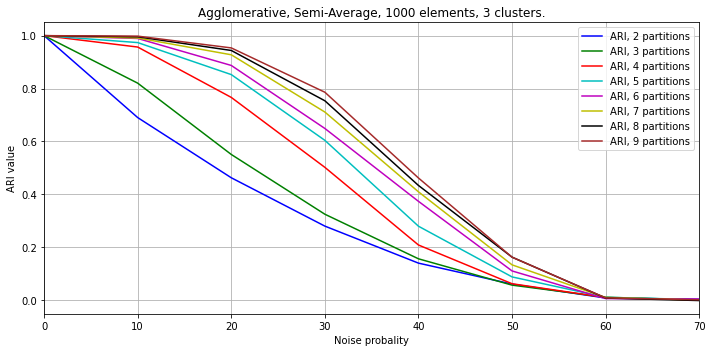

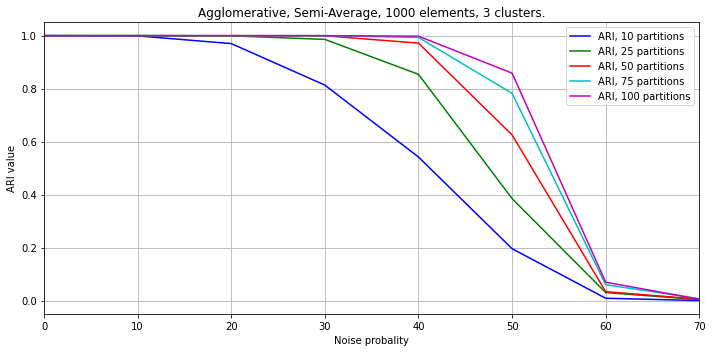

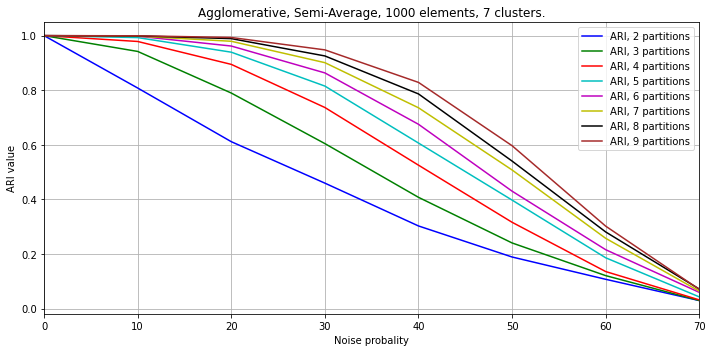

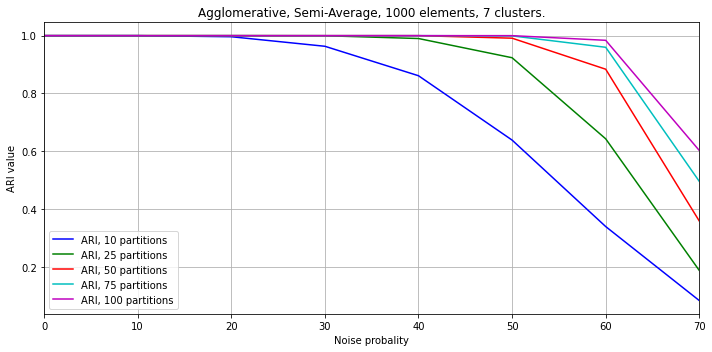

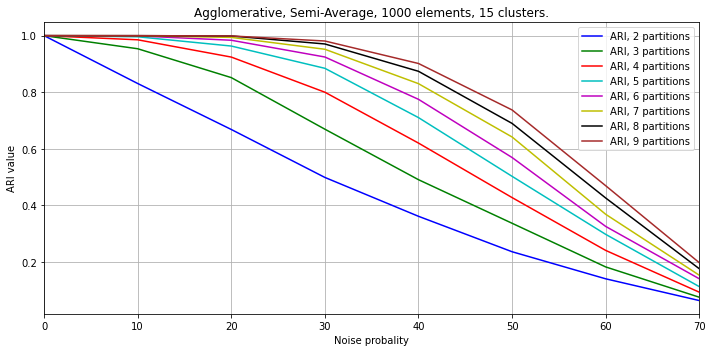

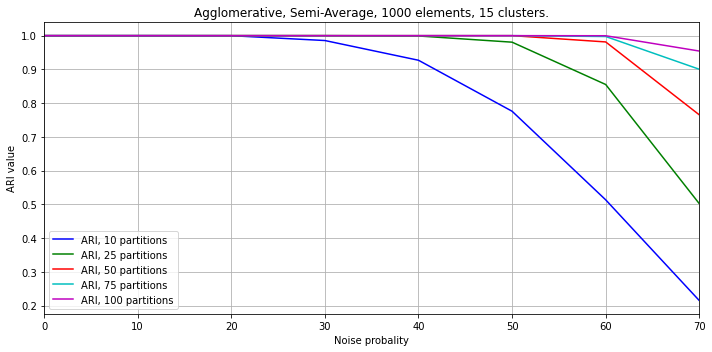

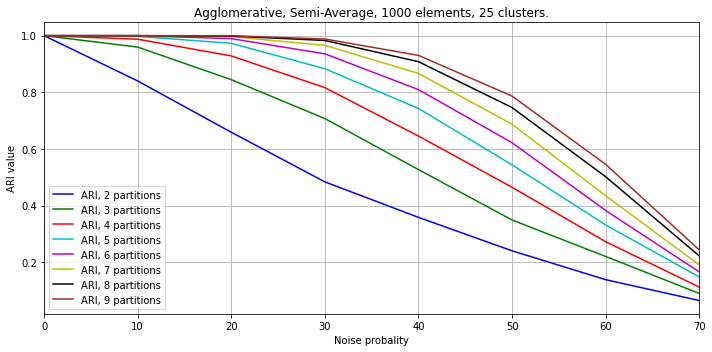

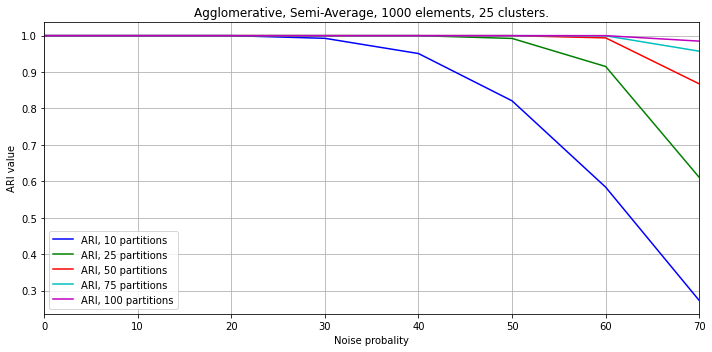

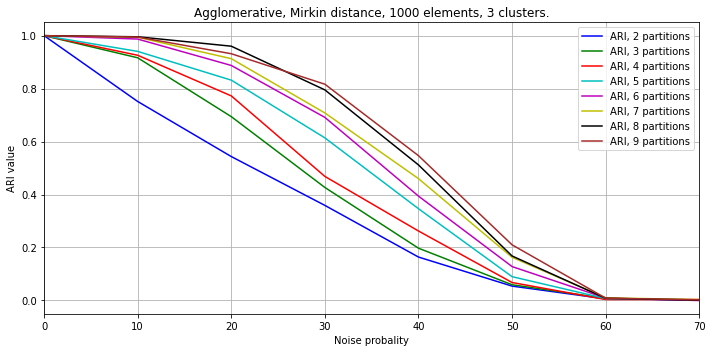

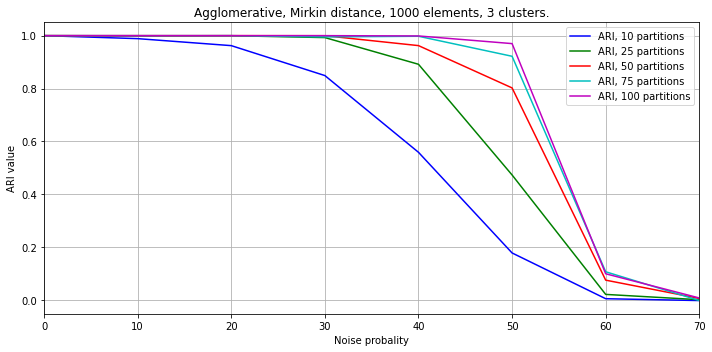

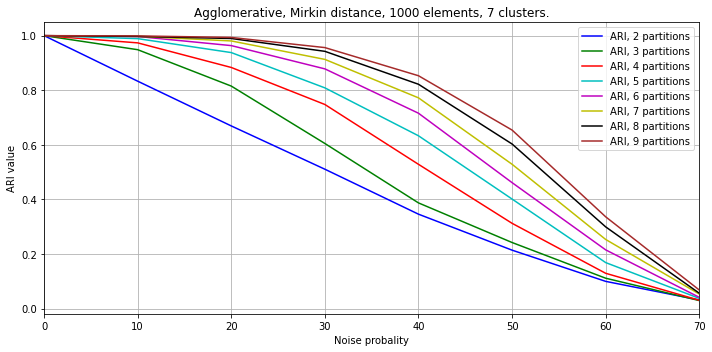

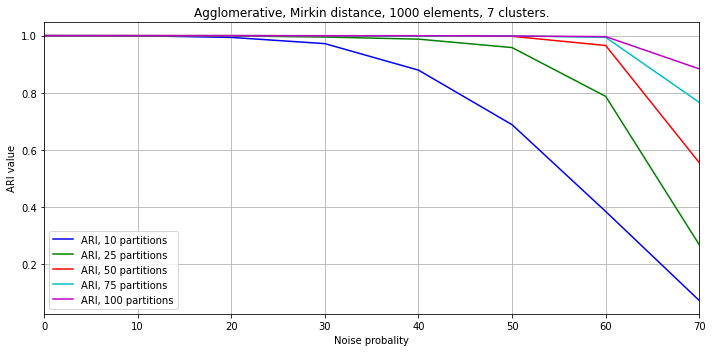

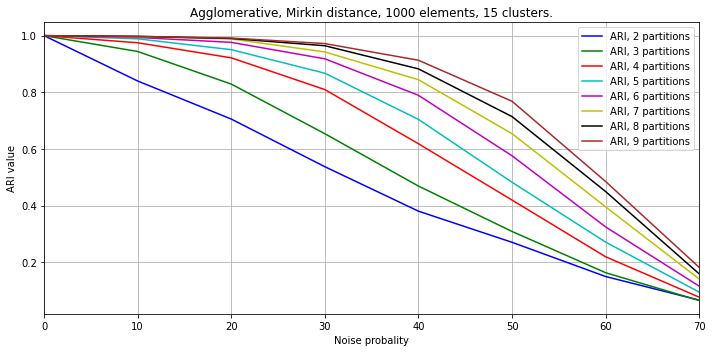

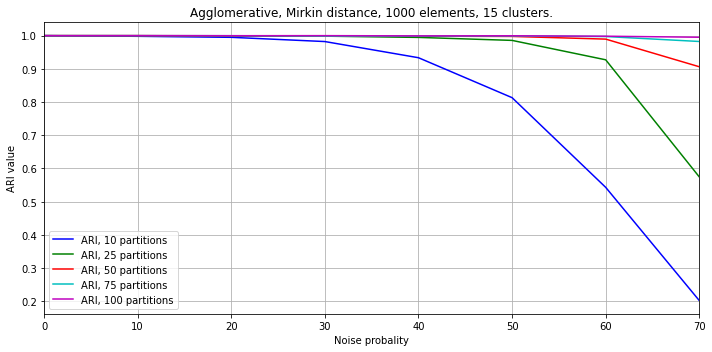

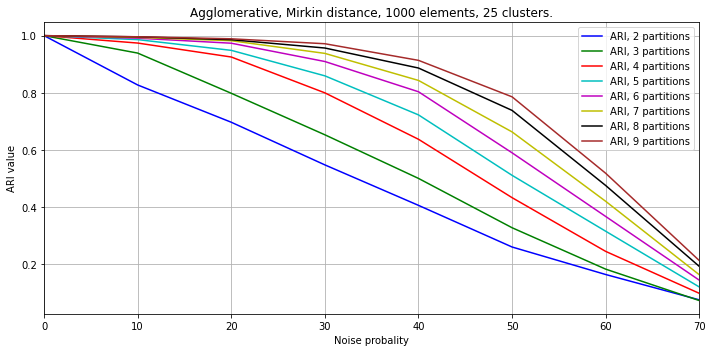

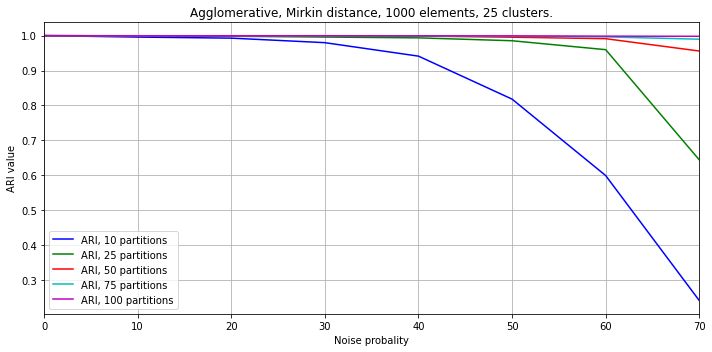

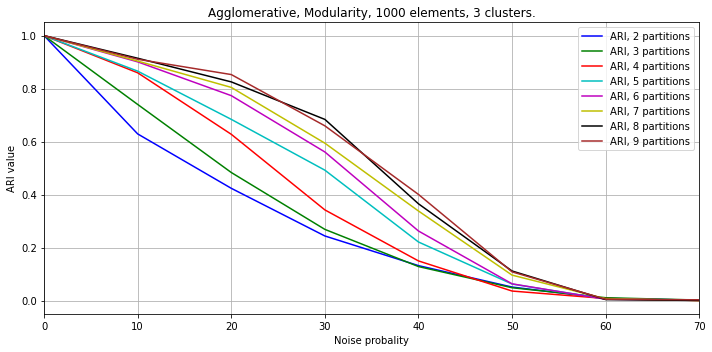

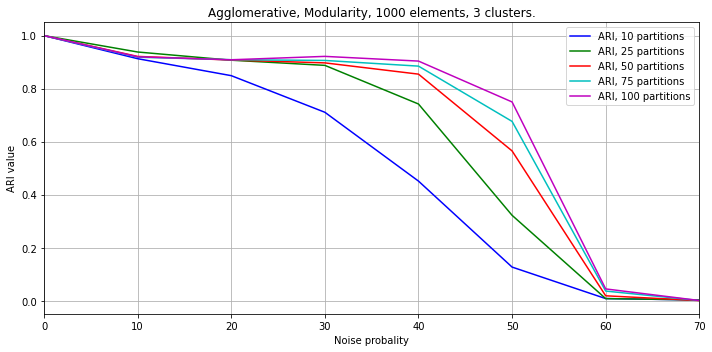

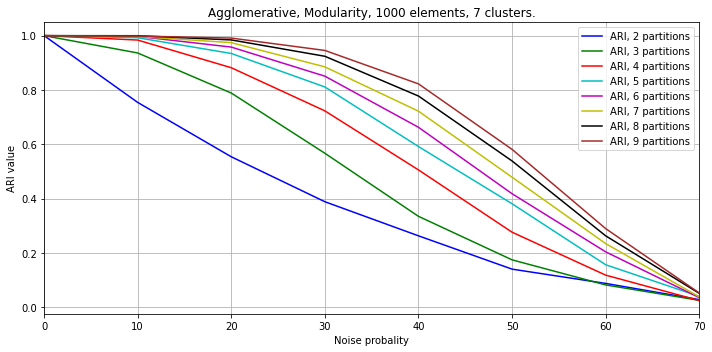

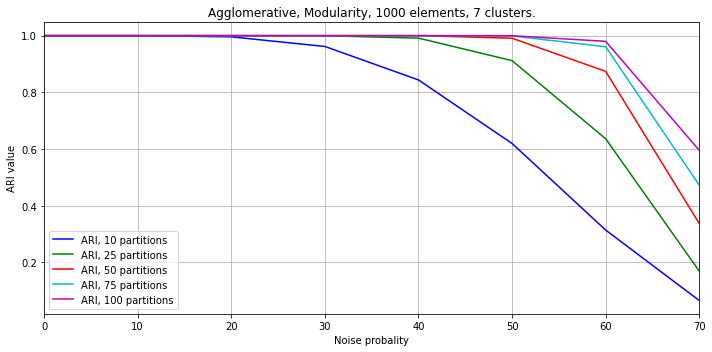

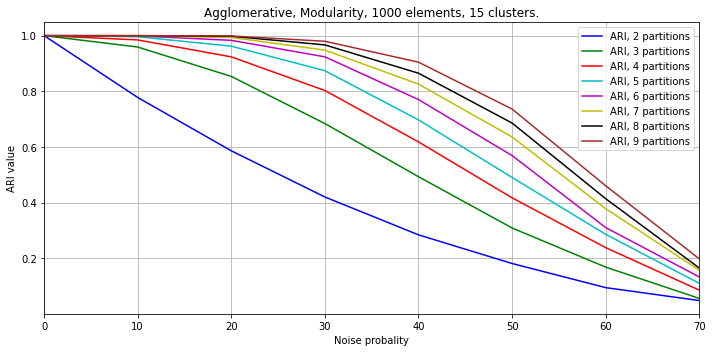

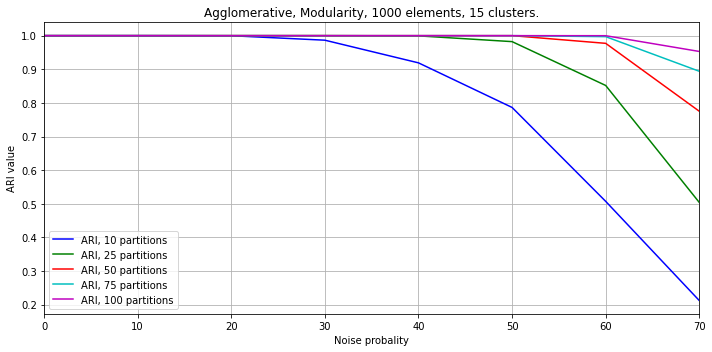

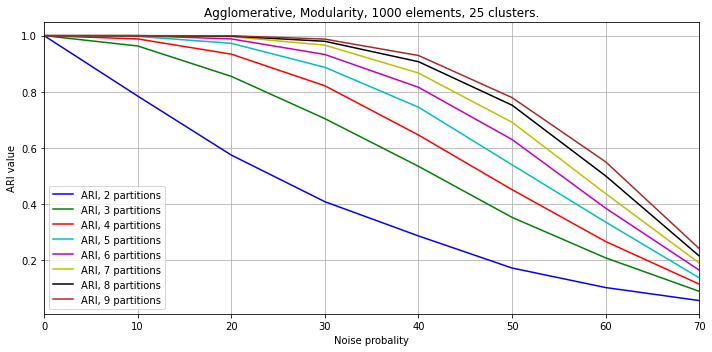

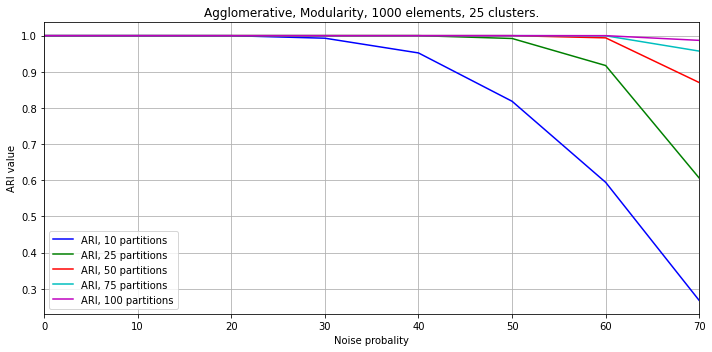

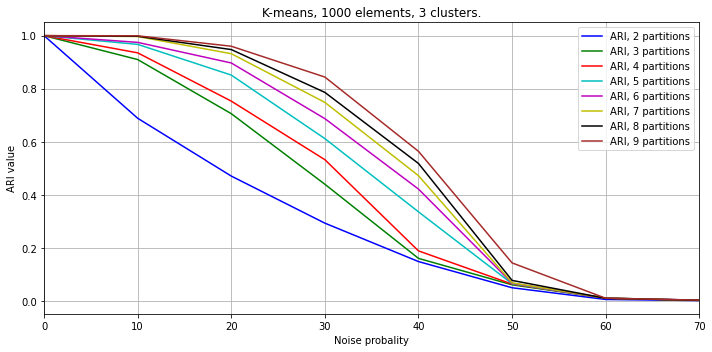

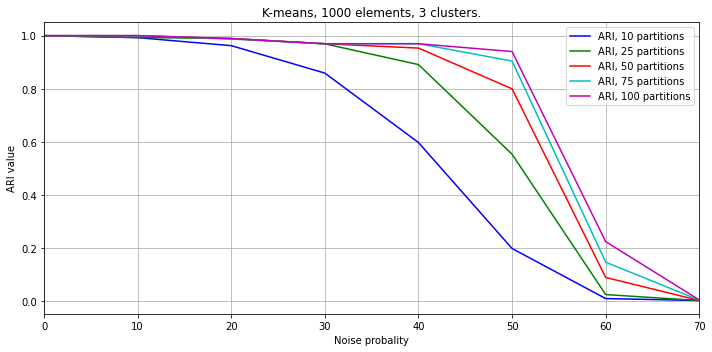

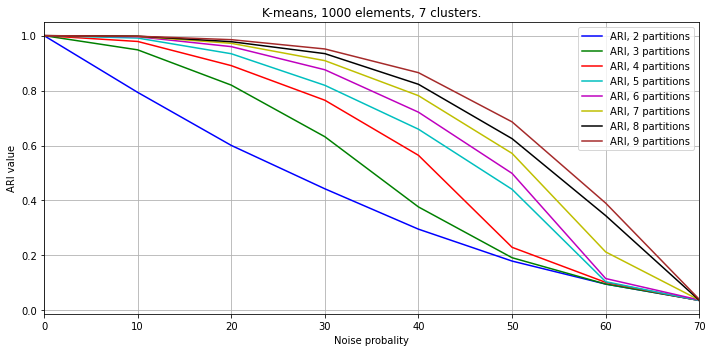

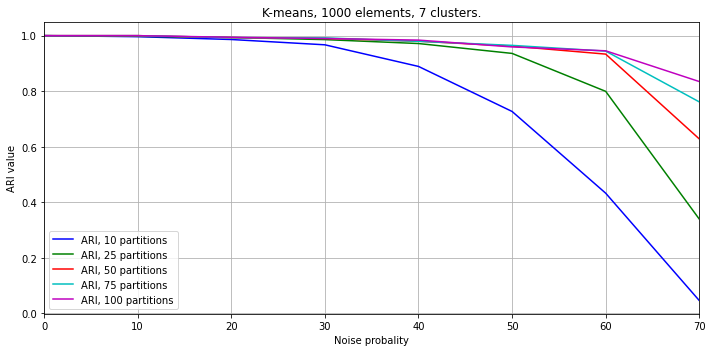

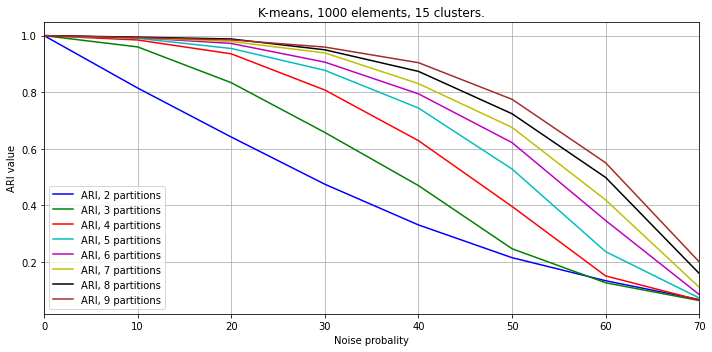

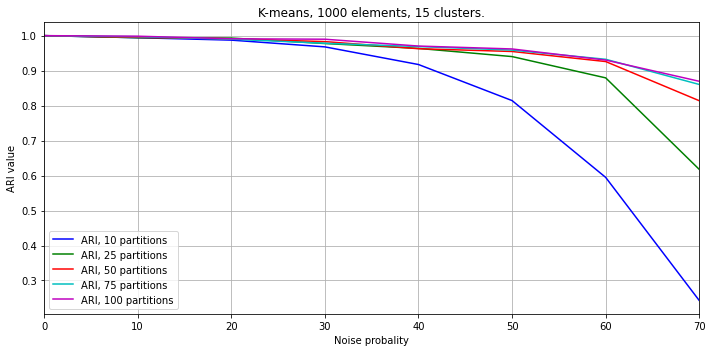

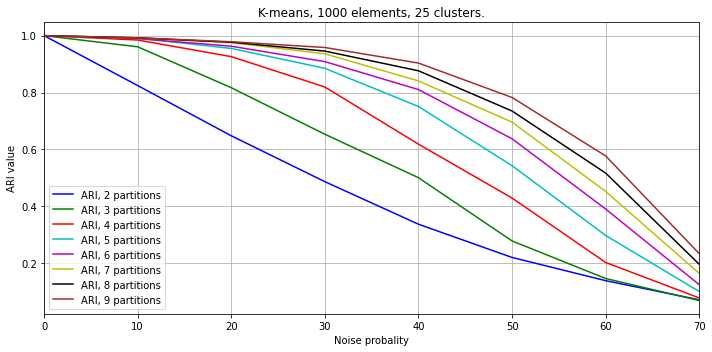

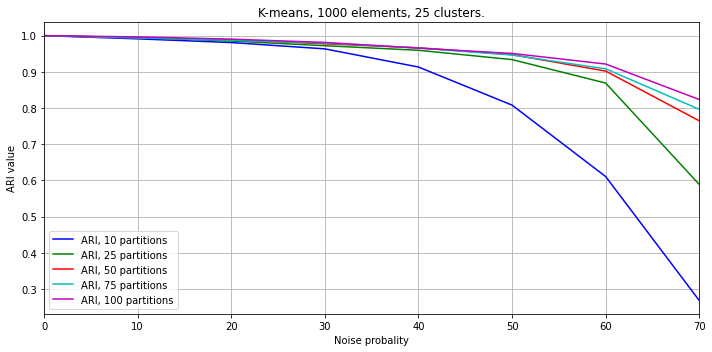

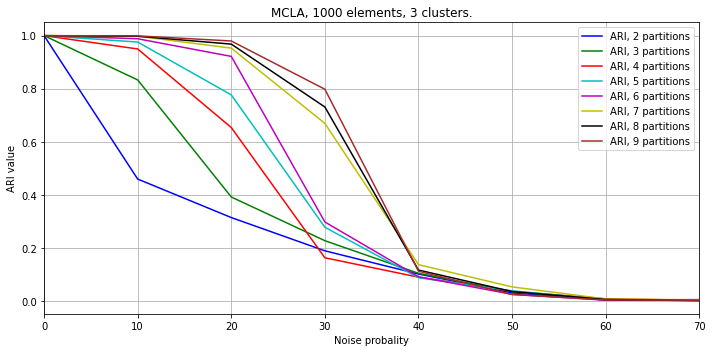

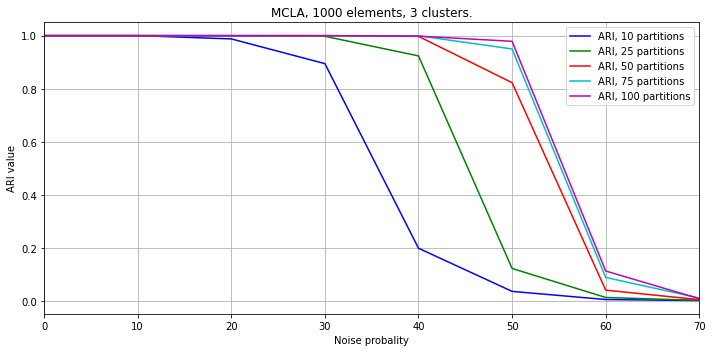

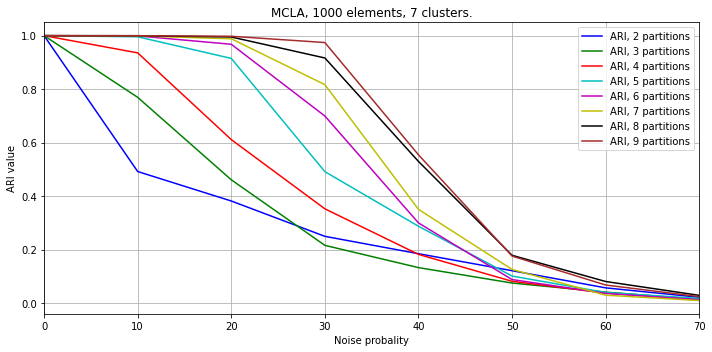

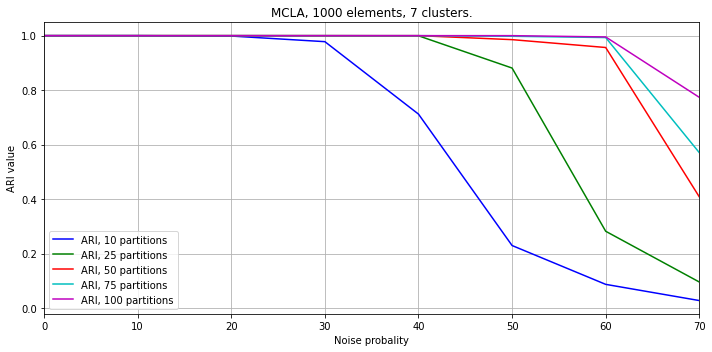

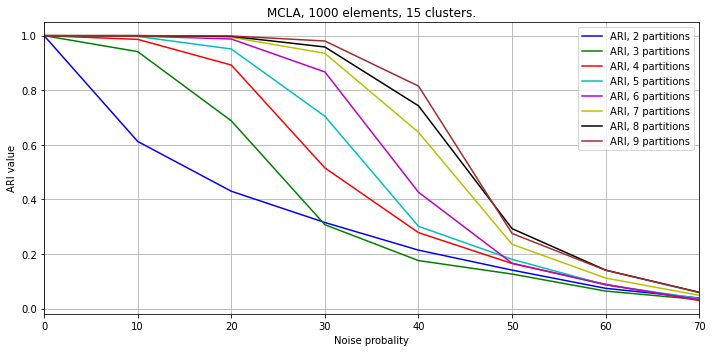

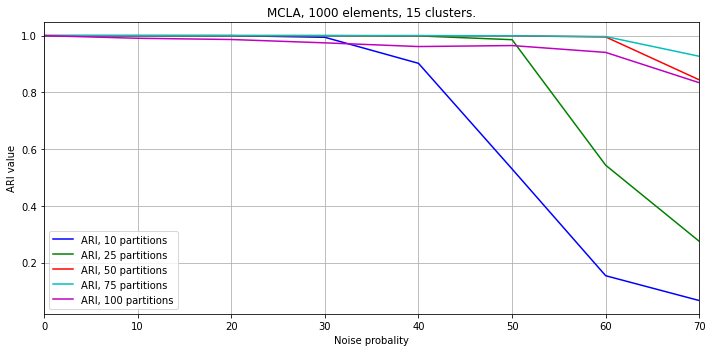

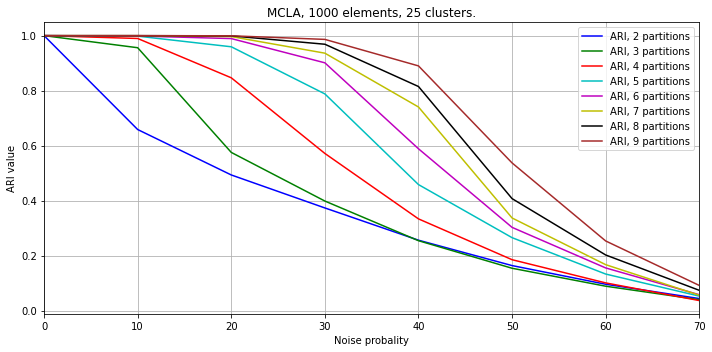

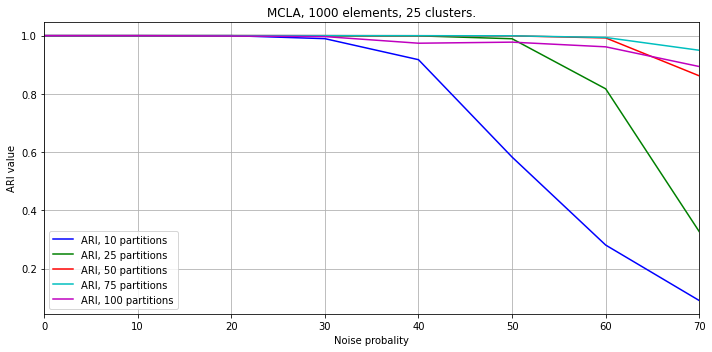

In [22]:
for algo in range(len(algo_names)):
    for num_cl in list_of_num_clusters:
        answers_2_9 = load_answers(num_cl, algo_dirr[algo], 1, 0)
        answers = load_answers(num_cl, algo_dirr[algo], 1, 1)
        draw_kolvo_ari(answers_2_9, num_cl, algo_names[algo], 1)
        draw_kolvo_ari(answers, num_cl, algo_names[algo], 0)

In [16]:
def draw_results(results, num_cl, partition):
    fig, ax = plt.subplots(figsize=(10, 5))
    yrs = np.array([0, 10, 20, 30, 40, 50, 60, 70])
    for i in range(len(results)):
        ax.plot(yrs, results[i], color = colors[i], label = f'{algo_names[i]}')
    
    ax.set_title(f'{partition} partitions, 1000 elements, {num_cl} clusters')
    ax.legend(loc='upper left')
    ax.set_ylabel('AMI value')
    ax.set_xlabel('Noise probality')
    ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
    ax.legend()
    ax.grid()
    fig.tight_layout()

    plt.show()

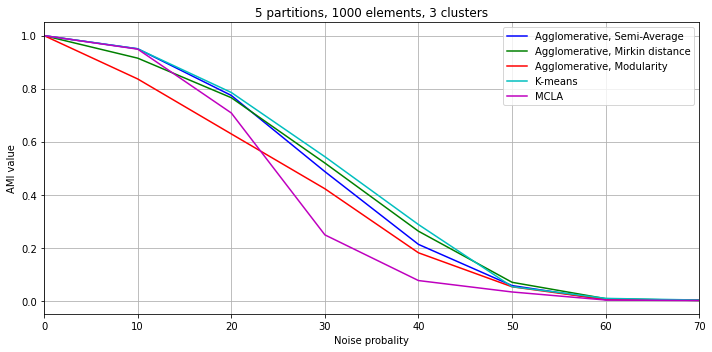

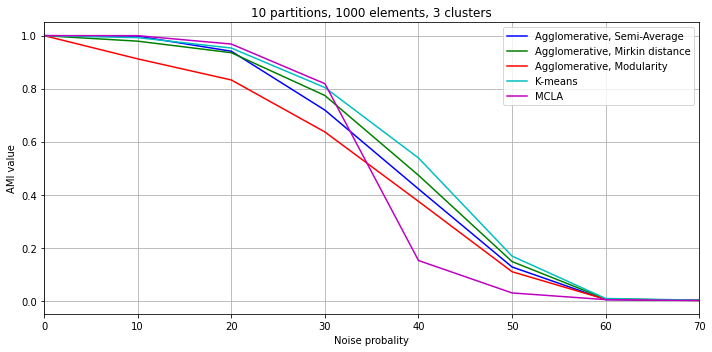

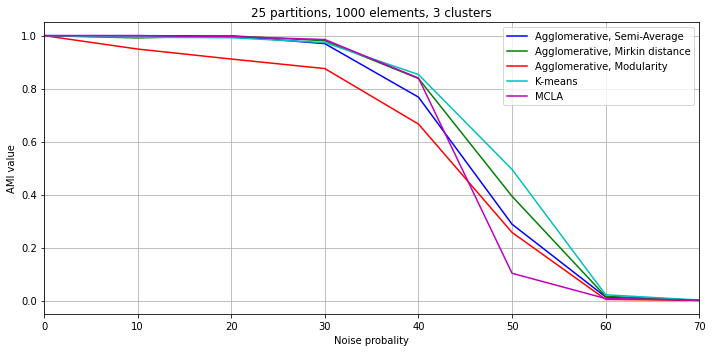

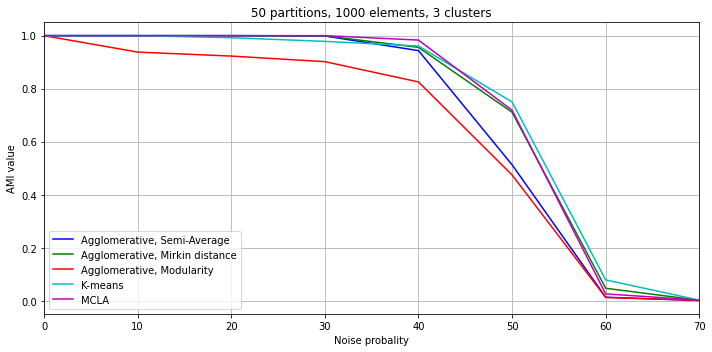

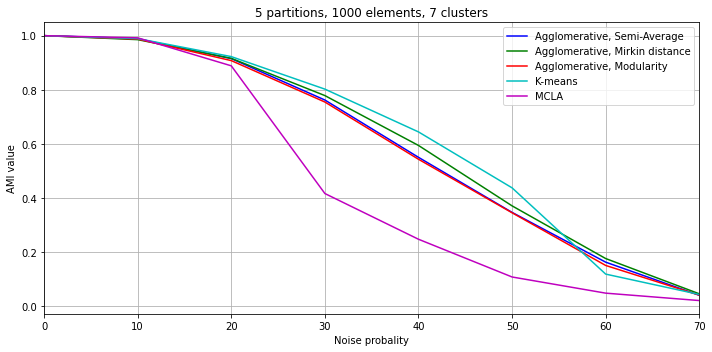

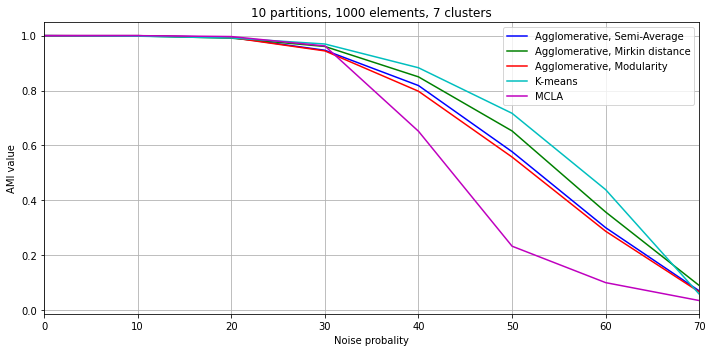

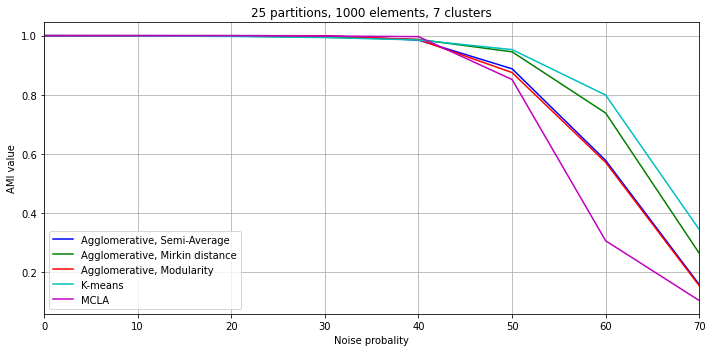

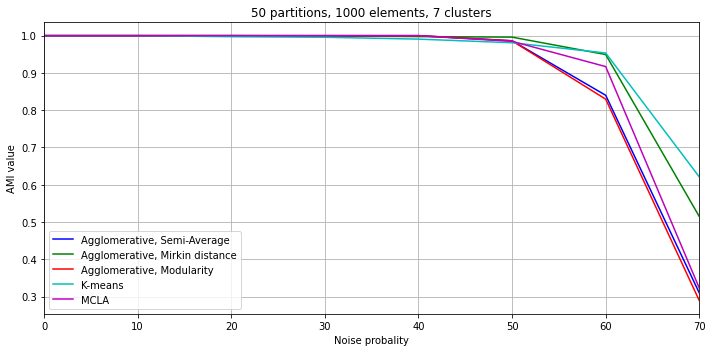

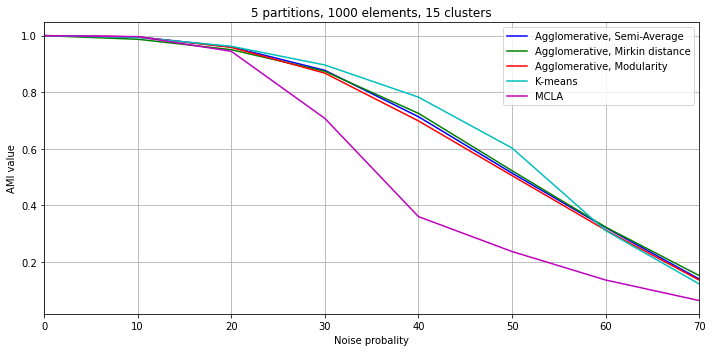

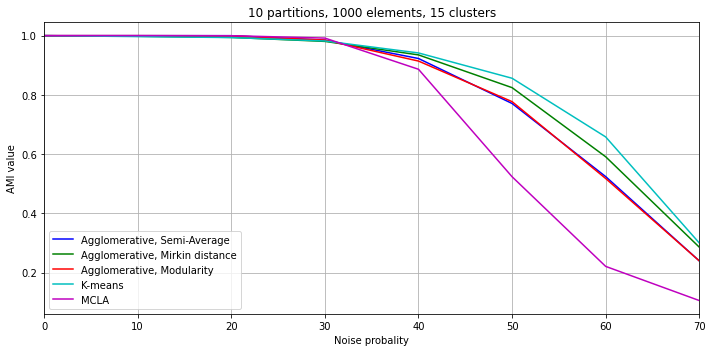

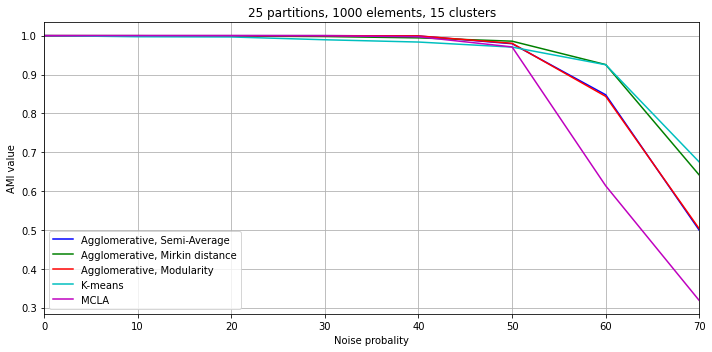

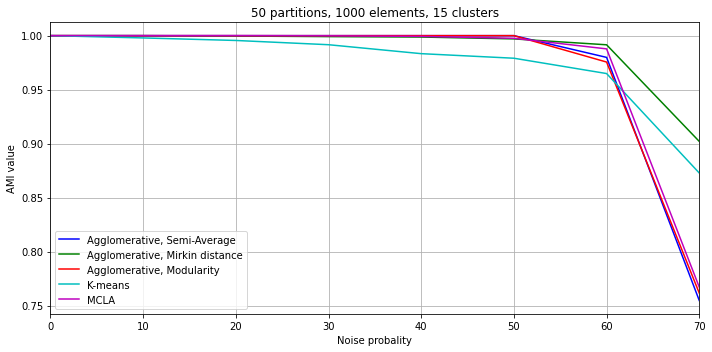

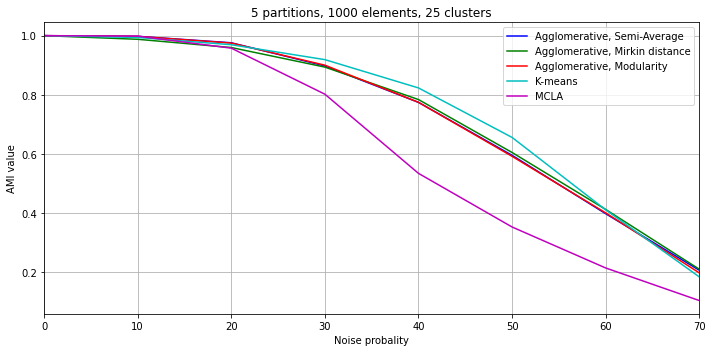

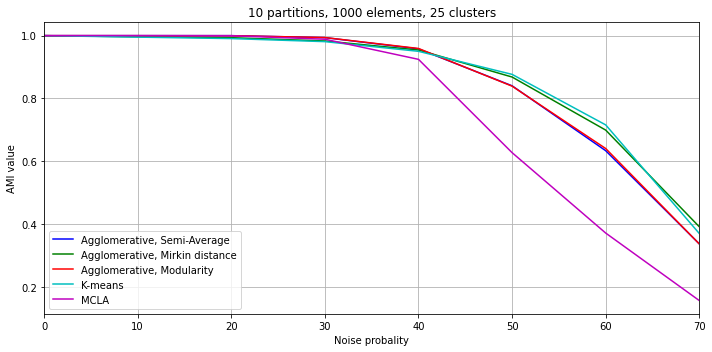

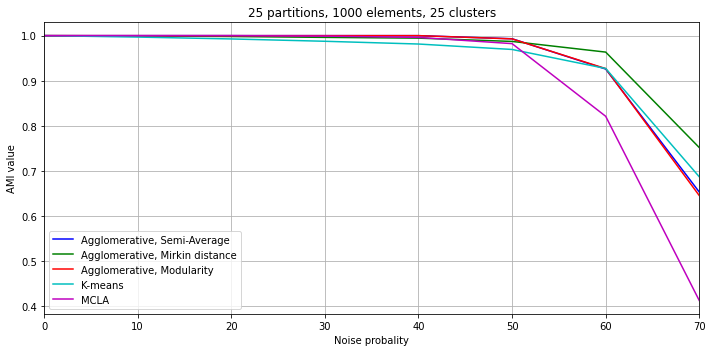

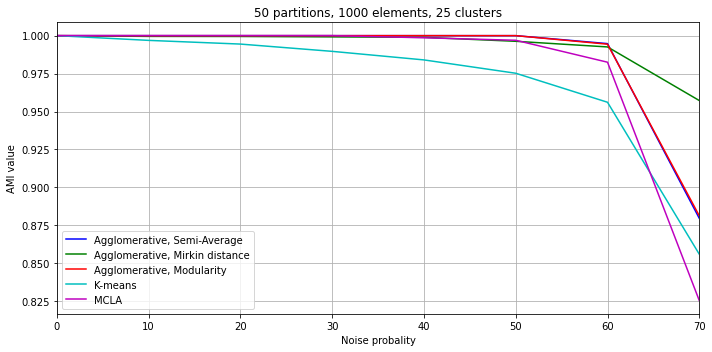

In [17]:
my_list = [10, 25, 50]
for num_cl in list_of_num_clusters:
    partitions = []
    partitions_2_9 = []
    for algo in range(len(algo_names)):
        answers_2_9 = load_answers(num_cl, algo_dirr[algo], 0, 0)
        answers = load_answers(num_cl, algo_dirr[algo], 0, 1)
        partitions.append(answers)
        partitions_2_9.append(answers_2_9)
    for j in [3]:
        answers_2_9 = []
        for i in range(len(algo_names)):
            answers_2_9.append(partitions_2_9[i][j])
        draw_results(answers_2_9, num_cl, list_of_kolvo_2_9[j])
    for j in range(len(my_list)):
        answers = []
        for i in range(len(algo_names)):
            answers.append(partitions[i][j])
        draw_results(answers, num_cl, my_list[j])